In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns


In [2]:
train_redu = pd.read_csv('dataset/train_redu.csv')
test_redu = pd.read_csv('dataset/test_redu.csv')
train_1xtds = pd.read_csv('dataset/train_1xtds.csv')

x_train = [(x,y) for x, y in zip(train_redu['intensidade'], train_redu['simetria'])]
y_train = train_redu['label']

x_test = [(x,y) for x, y in zip(test_redu['intensidade'], test_redu['simetria'])]
y_test = test_redu['label']

In [3]:
#transformando em vetor para poder aplicar metodos
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

x_train = x_train.T
x_test = x_test.T
y_test = y_test.reshape(1, -1)
y_train = y_train.reshape(1, -1)

In [4]:
print("Shape of x_train : ", x_train.shape)
print("Shape of y_train : ", y_train.shape)
print("Shape of x_test : ", x_test.shape)
print("Shape of y_test : ", y_test.shape)

Shape of x_train :  (2, 2186)
Shape of y_train :  (1, 2186)
Shape of x_test :  (2, 1115)
Shape of y_test :  (1, 1115)


### 1 x todos

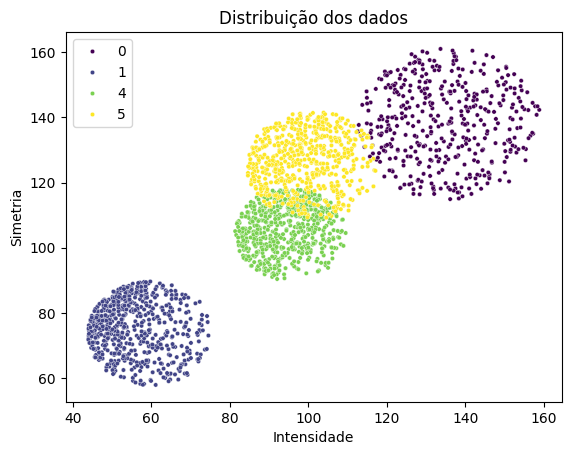

In [5]:
sns.scatterplot(x='intensidade', y='simetria', hue='label', data=train_redu, palette='viridis', s=10)

plt.xlabel('Intensidade')
plt.ylabel('Simetria')
plt.title('Distribuição dos dados')
plt.legend()
plt.show()

In [6]:
classes = np.unique(y_train)
y_train_bin = {}

for i, cls in enumerate(classes):
    print(i, cls)
    if cls == 0:
        y_train_bin[cls] = np.where(y_train == cls, 0, 1)

y_train_bin

0 0
1 1
2 4
3 5


{np.int64(0): array([[0, 0, 0, ..., 1, 1, 1]])}

### Funções

In [7]:
def sigmoide(x):
    return 1/(1 + np.exp(-x))

In [8]:
def acuracia(y, pred, conjunto):

    total = len(y[0])

    acertos = 0

    for i in range(total):
        if pred[0][i] == y[0][i]:
            acertos += 1
    
    print(f"Acuracia do modelo no conjunto {conjunto}: ", (acertos/total)*100, "%")

In [9]:
def rl_fit(X, Y, titulo, learning_rate = 0.0015, iterations = 100000):
    
    #numero de amostras
    m = X.shape[1]
    #print('m:', m)
    
    #numero de features
    n = X.shape[0]
    #print('n:', n)
    
    #matriz de pesos
    W = np.zeros((n,1))
    #print('W:', W)

    #bias
    B = 0
    
    cost_list = []

    #print(f'para o conjunto de {titulo}')
    #print('')
    
    for i in range(iterations):
        
        #forward propagation
        Z = np.dot(W.T, X) + B
        #print('Z:', Z)

        #sigmoid
        A = sigmoide(Z)
        #print('A:', A)

        #custo
        cost = -(1/m)*np.sum( Y*np.log(A) + (1-Y)*np.log(1-A))
        #print('cost:', cost)
        
        #gradiente descendente
        dW = (1/m)*np.dot(A-Y, X.T)
        #print('dW:', dW)
        dB = (1/m)*np.sum(A - Y)
        #print('dB:', dB)
        
        W = W - learning_rate*dW.T
        #print('W:', W)
        B = B - learning_rate*dB
        #print('B:', B)
        
        #historico de custo
        cost_list.append(cost)
        

        if(i%(iterations/10) == 0):
            print(f"custo depois de {i} iterações:", cost)

    print('')

    return W, B, cost_list

In [10]:
def predict(X, W, B):

    #predições    
    Z_final = np.dot(W.T, X) + B
    A_final = sigmoide(Z_final)
    
    y_pred = np.where(A_final >= 0.5, 1, 0)

    return y_pred

In [11]:
W, B, hist_custo, y_pred_treino = {}, {}, {}, {}

In [12]:
def regressao_logistica(cls, x, y):

    print(f'Treinando para a classe {cls}')

    W[cls], B[cls], hist_custo[cls] = rl_fit(x_train, y_train_bin[cls], cls)
    y_pred_treino[cls] = predict(x_train, W[cls], B[cls])

    

In [13]:
W, B, hist_custo, y_pred_treino = {}, {}, {}, {}

for cls in classes:
    if cls == 0:
        print(f"Treinando para a classe {cls}")
        W[cls], B[cls], hist_custo[cls] = rl_fit(x_train, y_train_bin[cls], cls)
        y_pred_treino[cls] = predict(x_train, W[cls], B[cls])

Treinando para a classe 0
custo depois de 0 iterações: 0.6931471805599453
custo depois de 10000 iterações: 0.9776457193304061
custo depois de 20000 iterações: 0.950847186320478
custo depois de 30000 iterações: 0.9244135919497496
custo depois de 40000 iterações: 0.898353187698356
custo depois de 50000 iterações: 0.8726826520505488
custo depois de 60000 iterações: 0.8474275152243553
custo depois de 70000 iterações: 0.822621127448705
custo depois de 80000 iterações: 0.7983026952765092
custo depois de 90000 iterações: 0.774514762457764



In [14]:
y_pred_treino[0][0]

array([1, 1, 1, ..., 1, 1, 1])

In [15]:
len(train_1xtds)

2186

In [16]:
print(len(y_pred_treino[0][0]), len(y_train_bin[0][0]))

2186 2186


In [17]:
indices_mantem = []

for i in range(len(train_1xtds)):
    if(y_pred_treino[0][0][i] == 1):
        indices_mantem.append(i)

train_redu_1 = train_1xtds.iloc[indices_mantem]

len(train_redu_1)

2105

In [18]:
x_train_1 = [(x,y) for x, y in zip(train_redu_1['intensidade'], train_redu_1['simetria'])]
y_train_1 = train_redu_1['label']

x_train_1 = np.array(x_train_1)
y_train_1 = np.array(y_train_1)

x_train_1 = x_train_1.T
y_train_1 = y_train_1.reshape(1, -1)

print("Shape of x_train_1 : ", x_train_1.shape)
print("Shape of y_train_1 : ", y_train_1.shape)

Shape of x_train_1 :  (2, 2105)
Shape of y_train_1 :  (1, 2105)


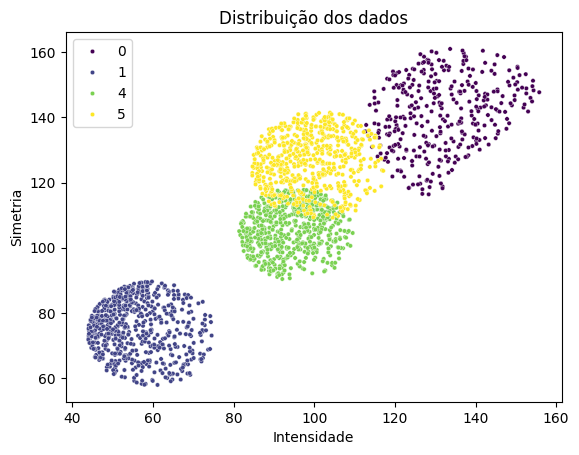

In [19]:
sns.scatterplot(x='intensidade', y='simetria', hue='label', data=train_redu_1, palette='viridis', s=10)

plt.xlabel('Intensidade')
plt.ylabel('Simetria')
plt.title('Distribuição dos dados')
plt.legend()
plt.show()

In [20]:
train_redu['label'].value_counts()

label
1    608
4    577
5    576
0    425
Name: count, dtype: int64

In [21]:
train_redu_1['label'].value_counts()


label
1    608
4    577
5    576
0    344
Name: count, dtype: int64

In [22]:
y_train_1

array([[0, 0, 0, ..., 5, 5, 5]])

In [23]:
for i, cls in enumerate(classes):
    print(i, cls)
    if cls == 1:
        y_train_bin[cls] = np.where(y_train_1 == cls, 0, 1)

y_train_bin

0 0
1 1
2 4
3 5


{np.int64(0): array([[0, 0, 0, ..., 1, 1, 1]]),
 np.int64(1): array([[1, 1, 1, ..., 1, 1, 1]])}

In [24]:
for cls in classes:
    if cls == 1:
        print(f"Treinando para a classe {cls}")
        W[cls], B[cls], hist_custo[cls], y_pred_treino[cls] = regressao_logistica(x_train_1, y_train_bin[cls], cls)

Treinando para a classe 1
Treinando para a classe [[145.43529412 118.57647059 127.6        ... 110.74509804  99.3254902
  101.19215686]
 [148.57254902 137.11372549 134.04705882 ... 133.01960784 132.13333333
  141.36470588]]


TypeError: unhashable type: 'numpy.ndarray'

In [ ]:
indices_mantem_1 = []

for i in range(len(train_redu_1)):
    if(y_pred_treino[1][0][i] == 1):
        indices_mantem_1.append(i)

train_redu_4 = train_redu_1.iloc[indices_mantem_1]

len(train_redu_4)

1544

In [ ]:
x_train_4 = [(x,y) for x, y in zip(train_redu_4['intensidade'], train_redu_4['simetria'])]
y_train_4 = train_redu_4['label']

x_train_4 = np.array(x_train_4)
y_train_4 = np.array(y_train_4)

x_train_4 = x_train_4.T
y_train_4 = y_train_4.reshape(1, -1)

print("Shape of x_train_4 : ", x_train_4.shape)
print("Shape of y_train_4 : ", y_train_4.shape)

Shape of x_train_4 :  (2, 1544)
Shape of y_train_4 :  (1, 1544)


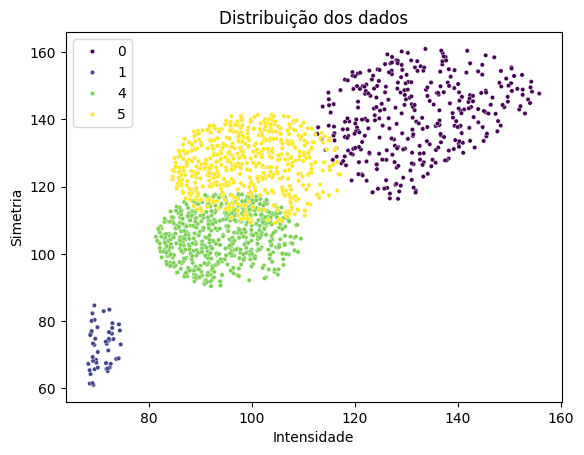

In [ ]:
sns.scatterplot(x='intensidade', y='simetria', hue='label', data=train_redu_4, palette='viridis', s=10)

plt.xlabel('Intensidade')
plt.ylabel('Simetria')
plt.title('Distribuição dos dados')
plt.legend()
plt.show()

In [ ]:
train_redu_4['label'].value_counts()

label
4    577
5    576
0    344
1     47
Name: count, dtype: int64

In [ ]:
for i, cls in enumerate(classes):
    print(i, cls)
    if cls == 4:
        y_train_bin[cls] = np.where(y_train_4 == cls, 0, 1)

y_train_bin

0 0
1 1
2 4
3 5


{np.int64(0): array([[0, 0, 0, ..., 1, 1, 1]]),
 np.int64(1): array([[1, 1, 1, ..., 1, 1, 1]]),
 np.int64(4): array([[1, 1, 1, ..., 1, 1, 1]])}

In [ ]:
for cls in classes:
    if cls == 4:
        print(f"Treinando para a classe {cls}")
        W[cls], B[cls], hist_custo[cls], y_pred_treino[cls] = regressao_logistica(x_train_4, y_train_bin[cls], cls)

Treinando para a classe 4
custo depois de 0 iterações: 0.4895787954183693
custo depois de 10000 iterações: 0.686476724798989
custo depois de 20000 iterações: 0.487434773198514
custo depois de 30000 iterações: 2.619033192298132
custo depois de 40000 iterações: 2.615430619160725
custo depois de 50000 iterações: 0.630317192030667
custo depois de 60000 iterações: 0.4559330885584148
custo depois de 70000 iterações: 1.1496727368038577
custo depois de 80000 iterações: 2.5978446288909933
custo depois de 90000 iterações: 2.5745993604191346



In [ ]:
indices_mantem.clear()

for i in range(len(train_redu_4)):
    if(y_pred_treino[1][0][i] == 1):
        indices_mantem.append(i)

train_redu_5 = train_redu_4.iloc[indices_mantem]

len(train_redu_5)

983

In [ ]:
x_train_5 = [(x,y) for x, y in zip(train_redu_5['intensidade'], train_redu_5['simetria'])]
y_train_5 = train_redu_5['label']

x_train_5 = np.array(x_train_5)
y_train_5 = np.array(y_train_5)

x_train_5 = x_train_5.T
y_train_5 = y_train_5.reshape(1, -1)

print("Shape of x_train_5 : ", x_train_5.shape)
print("Shape of y_train_5 : ", y_train_5.shape)

Shape of x_train_5 :  (2, 983)
Shape of y_train_5 :  (1, 983)


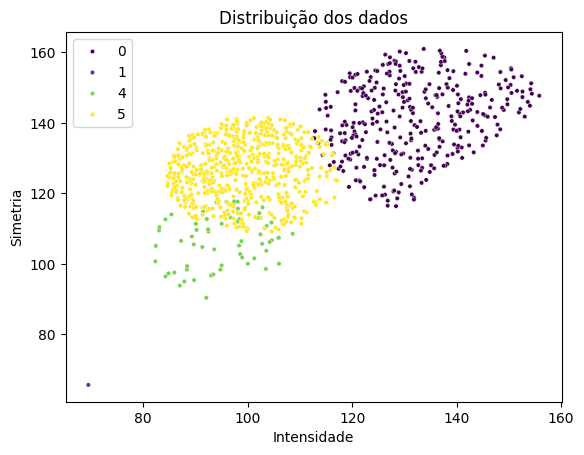

In [ ]:
sns.scatterplot(x='intensidade', y='simetria', hue='label', data=train_redu_5, palette='viridis', s=10)

plt.xlabel('Intensidade')
plt.ylabel('Simetria')
plt.title('Distribuição dos dados')
plt.legend()
plt.show()

In [ ]:
train_redu_5['label'].value_counts()

label
5    576
0    344
4     62
1      1
Name: count, dtype: int64

In [ ]:
for i, cls in enumerate(classes):
    print(i, cls)
    if cls == 5:
        y_train_bin[cls] = np.where(y_train_5 == cls, 0, 1)

y_train_bin

0 0
1 1
2 4
3 5


{np.int64(0): array([[0, 0, 0, ..., 1, 1, 1]]),
 np.int64(1): array([[1, 1, 1, ..., 1, 1, 1]]),
 np.int64(4): array([[1, 1, 1, ..., 1, 1, 1]]),
 np.int64(5): array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 

In [ ]:
for cls in classes:
    if cls == 5:
        print(f"Treinando para a classe {cls}")
        W[cls], B[cls], hist_custo[cls], y_pred_treino[cls] = regressao_logistica(x_train_5, y_train_bin[cls], cls)

Treinando para a classe 5
custo depois de 0 iterações: 0.31169427195353444
custo depois de 10000 iterações: 0.2338695932621794
custo depois de 20000 iterações: 0.2330402775112689
custo depois de 30000 iterações: 0.2322173175226875
custo depois de 40000 iterações: 0.23140063623533874
custo depois de 50000 iterações: 0.23059015767245047
custo depois de 60000 iterações: 0.2297858069513487
custo depois de 70000 iterações: 0.22898751029179626
custo depois de 80000 iterações: 0.2281951950230082
custo depois de 90000 iterações: 0.2274087895894356



In [ ]:
indices_mantem.clear()

for i in range(len(train_redu_5)):
    if(y_pred_treino[1][0][i] == 1):
        indices_mantem.append(i)

train_redu_tds = train_redu_5.iloc[indices_mantem]

len(train_redu_tds)

422

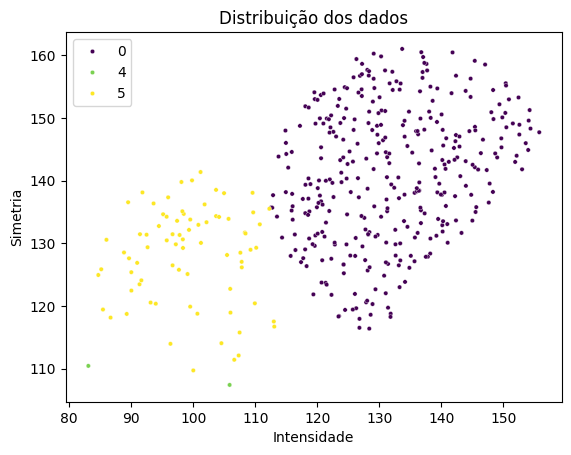

In [ ]:
sns.scatterplot(x='intensidade', y='simetria', hue='label', data=train_redu_tds, palette='viridis', s=10)

plt.xlabel('Intensidade')
plt.ylabel('Simetria')
plt.title('Distribuição dos dados')
plt.legend()
plt.show()

### Vizualização Gráfica

Linha de Decisão:

$$y = -\left(\frac{W[0] * x + B}{W[1]}\right)$$

Onde:
<br>
- $W[i] (pesos) ajustam a inclinação da reta <br>
- $B$ (bias) ajusta a posição da reta no gráfico <br>
- $x$ representa a lista ($x_{min}$, $x_{max}$)


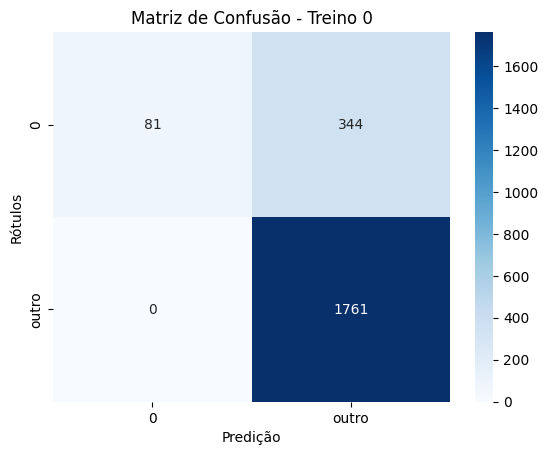

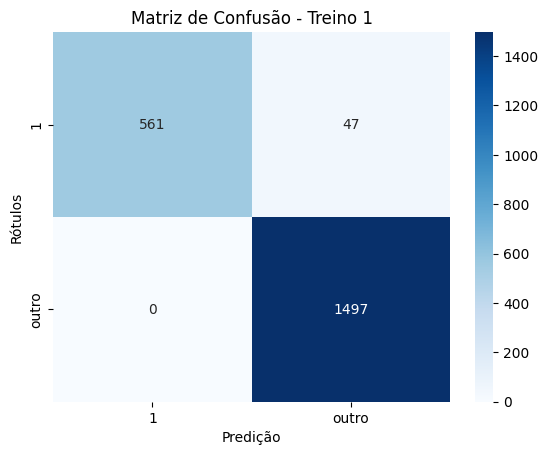

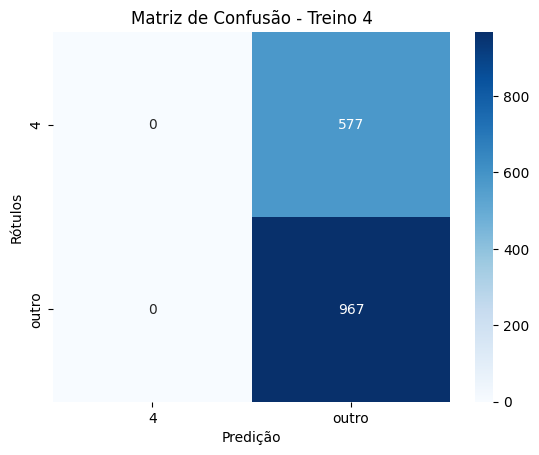

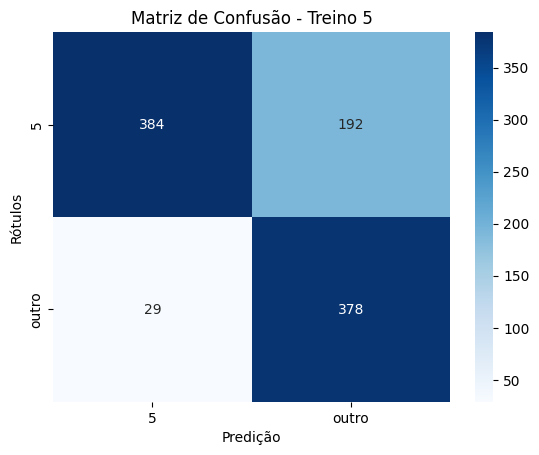

In [ ]:
for cls in classes:  

    #convertendo em vetores 1D
    y_train_f = y_train_bin[cls].flatten()
    y_pred_f = y_pred_treino[cls].flatten()

    cm = confusion_matrix(y_train_f, y_pred_f)

    sns.heatmap(cm, annot=True, fmt='d',
                cmap='Blues',
                xticklabels=[cls, 'outro'], 
                yticklabels=[cls, 'outro'])
    
    plt.xlabel('Predição')
    plt.ylabel('Rótulos')
    plt.title(f'Matriz de Confusão - Treino {cls}')
    plt.show()


C:\Users\kamil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kamil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kamil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:15

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         0
          17       0.00    

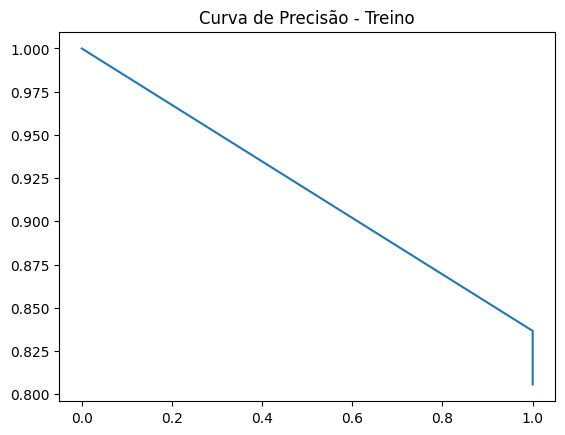

C:\Users\kamil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kamil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kamil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:15

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         1
          16       1.00      1.00      1.00         1
          17       1.00    

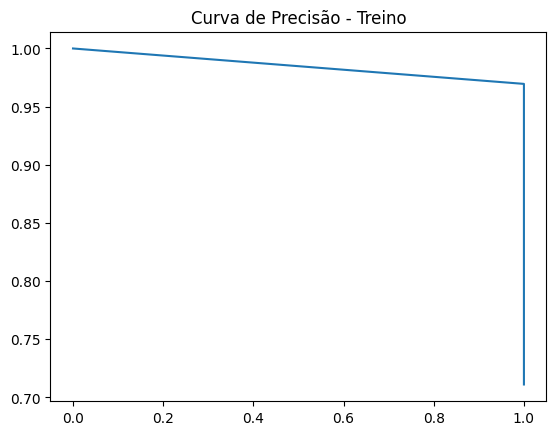

C:\Users\kamil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         1
          16       1.00      1.00      1.00         1
          17       1.00    

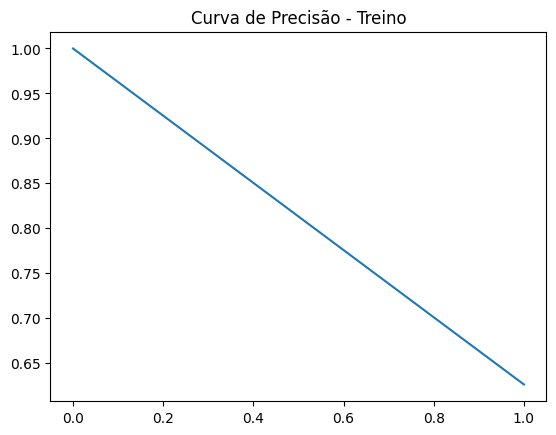

C:\Users\kamil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kamil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kamil\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:15

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         1
          14       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         1
          16       1.00      1.00      1.00         1
          17       1.00    

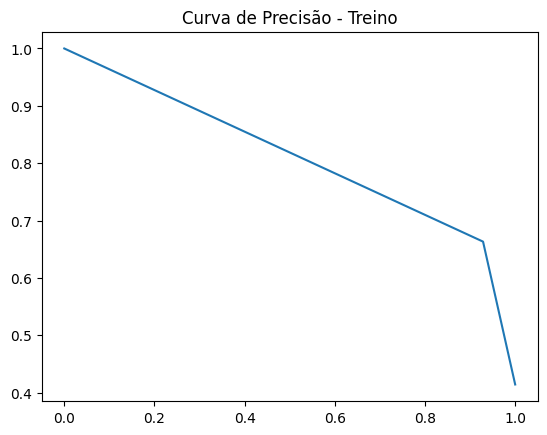

In [ ]:
#incompleto - falta verificar umas coisas

from sklearn.metrics import precision_recall_curve, classification_report

for cls in classes:
    report = classification_report(y_train_bin[cls], y_pred_treino[cls])
    #precisão x sensibilidade*
    precision, recall, _ = precision_recall_curve(y_train_bin[cls].flatten(), y_pred_treino[cls].flatten())

    print(report)

    plt.plot(recall, precision)
    plt.title('Curva de Precisão - Treino')
    plt.show()

#### Falta o F1-score

### Eficiência da Classificação

In [ ]:
y_pred_treino

{np.int64(0): array([[1, 1, 1, ..., 1, 1, 1]]),
 np.int64(1): array([[1, 1, 1, ..., 1, 1, 1]]),
 np.int64(4): array([[1, 1, 1, ..., 1, 1, 1]]),
 np.int64(5): array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
         1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 

In [ ]:
conjunto = 'n'
total = len(y_train_bin[0][0])

acertos = 0

for i in range(total):

    if y_pred_treino[0][0][i] == 0:
        acertos += 1
print( acertos)
print(total)
print(f"Acuracia do modelo no conjunto {conjunto}: ", (acertos/total)*100, "%")

81
2186
Acuracia do modelo no conjunto n:  3.705397987191217 %


In [ ]:
for cls in classes:
    print(f"Para a classe {cls}")
    acuracia(y_train_bin[cls], y_pred_treino[cls], "treino")
    print('')

Para a classe 0
Acuracia do modelo no conjunto treino:  84.26349496797805 %

Para a classe 1
Acuracia do modelo no conjunto treino:  97.76722090261283 %

Para a classe 4
Acuracia do modelo no conjunto treino:  62.629533678756474 %

Para a classe 5
Acuracia do modelo no conjunto treino:  77.51780264496439 %



In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

for cls in classes:
    
    print(f'Metricas de Erro - Treino {cls}')
    print("Erro médio quadrático: ", mean_squared_error(y_train_bin[cls], y_pred_treino[cls]))
    print("Erro médio absoluto: ", mean_absolute_error(y_train_bin[cls], y_pred_treino[cls]))
    print('')

Metricas de Erro - Treino 0
Erro médio quadrático:  0.15736505032021958
Erro médio absoluto:  0.15736505032021958

Metricas de Erro - Treino 1
Erro médio quadrático:  0.022327790973871733
Erro médio absoluto:  0.022327790973871733

Metricas de Erro - Treino 4
Erro médio quadrático:  0.37370466321243523
Erro médio absoluto:  0.37370466321243523

Metricas de Erro - Treino 5
Erro médio quadrático:  0.22482197355035605
Erro médio absoluto:  0.22482197355035605

